In [1]:
import shelve
import pprint as pp
with shelve.open('stock_data') as db:
    tsla_data = db['TSLA - WEEKLY']['Weekly Time Series']
lin_data = [float(price['1. open']) for price in [tsla_data[date] for date in tsla_data]]

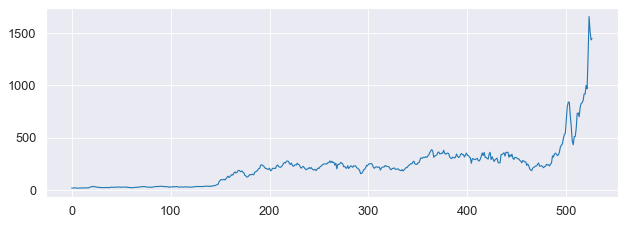

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
sns.set_context("paper", font_scale=1.3, rc={"lines.linewidth": 1})
fig = plt.figure(num=None, figsize=(8, 3), dpi=80)
axes = fig.add_subplot()
axes.plot(lin_data[::-1])
axes.grid()
fig.tight_layout()

In [13]:
import numpy as np
dates_x = np.array([i for i in tsla_data][::-1], dtype='datetime64')
lin_data = np.array(lin_data[::-1])

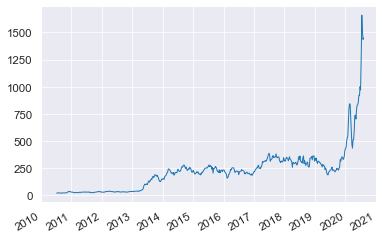

In [14]:
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()
ax.plot(dates_x, lin_data)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(dates_x[0], 'Y')
datemax = np.datetime64(dates_x[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
# ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()